# Simple moving average crossover

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [2]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import os
import pandas as pd
# import pandas_datareader as pdr
import numpy as np
import quantstats as qs
from config.constants import *
from util.plot_equity import plot_equity_trades
import matplotlib.pyplot as plt

## Get Result

## Load results strategy Buy and Hold

In [3]:
benchmark_D1 = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_D1.csv', index_col='Time', parse_dates=True)
benchmark_H4 = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H4.csv', index_col='Time', parse_dates=True)
benckmark_H1 = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H1.csv', index_col='Time', parse_dates=True)
benckmark_M30 = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M30.csv', index_col='Time', parse_dates=True)

## Load results Strategy

In [4]:
folder_strategy = 'SMA_crossover'

In [5]:
result_D1 = pd.read_csv(f'../../out/Technical_Strategy/{folder_strategy}/Backtest/result_D1.csv', index_col='Time', parse_dates=True)
result_H4 = pd.read_csv(
    f'../../out/Technical_Strategy/{folder_strategy}/Backtest/result_H4.csv', index_col='Time', parse_dates=True)
result_H1 = pd.read_csv(
    f'../../out/Technical_Strategy/{folder_strategy}/Backtest/result_H1.csv', index_col='Time', parse_dates=True)
result_M30 = pd.read_csv(
    f'../../out/Technical_Strategy/{folder_strategy}/Backtest/result_M30.csv', index_col='Time', parse_dates=True)

C:\Users\Win10\AppData\Local\Temp\ipykernel_32432\1007761503.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  result_M30 = pd.read_csv(


## Define Strategy

# Reports each time frame

## TF D1

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-02
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             1.0%

Cumulative Return          -0.1%
CAGR﹪                     -0.0%

Sharpe                     -0.05
Prob. Sharpe Ratio         41.28%
Smart Sharpe               -0.05
Sortino                    -0.07
Smart Sortino              -0.07
Sortino/√2                 -0.05
Smart Sortino/√2           -0.05
Omega                      0.92

Max Drawdown               -0.42%
Longest DD Days            3827
Volatility (ann.)          0.1%
Calmar                     -0.01
Skew                       0.27
Kurtosis                   244.31

Expected Daily %           -0.0%
Expected Monthly %         -0.0%
Expected Yearly %          -0.01%
Kelly Criterion            -4.34%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.01%
Expected Shortfall (cVaR)  -0.01%

Max Consecutive Wins 

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2012-09-17  2022-01-17  2023-03-10  3827     -0.422529         -0.332923
2  2012-03-05  2012-03-05  2012-03-28    24     -0.121330               NaN
3  2008-08-18  2008-08-18  2009-01-29   165     -0.093984               NaN

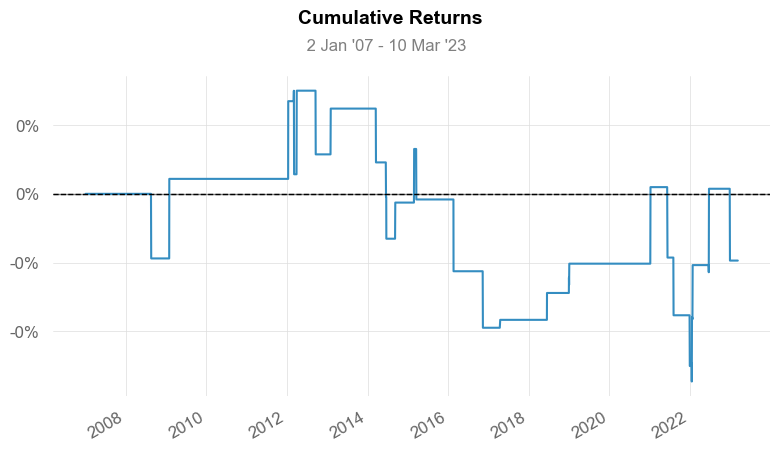

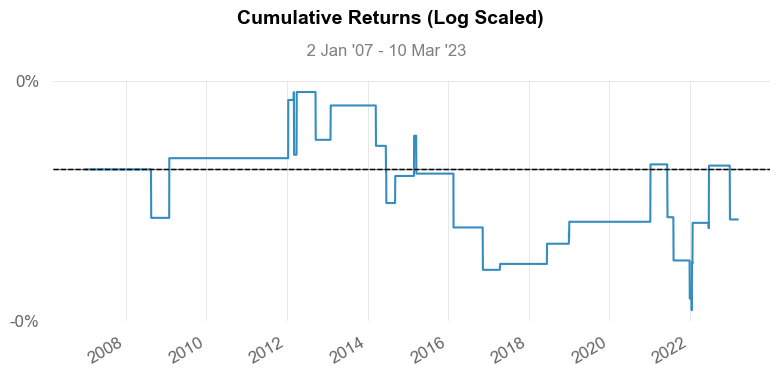

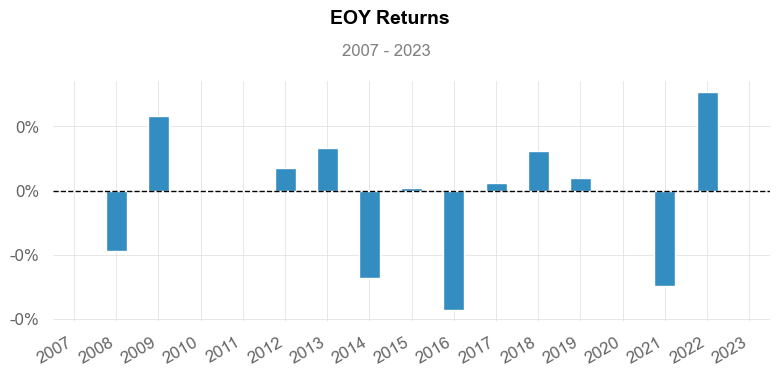

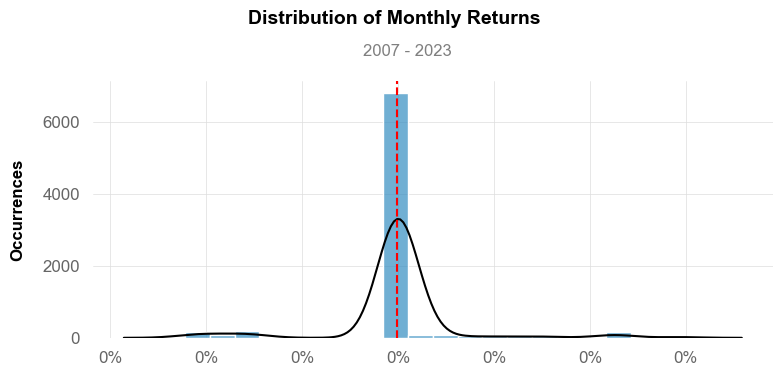

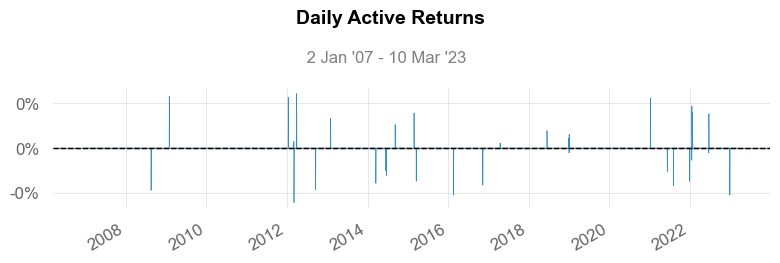

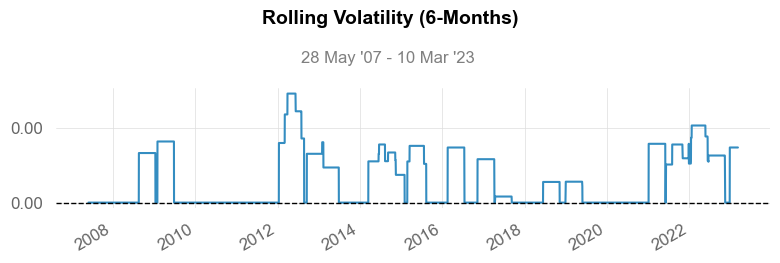

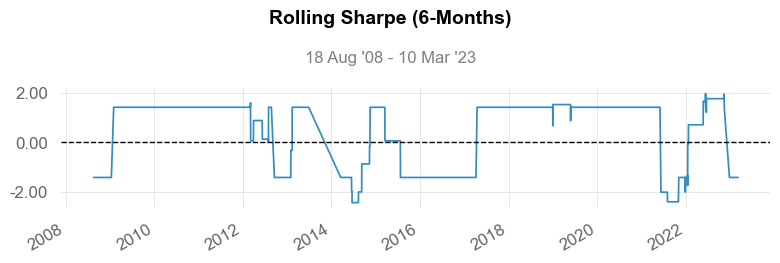

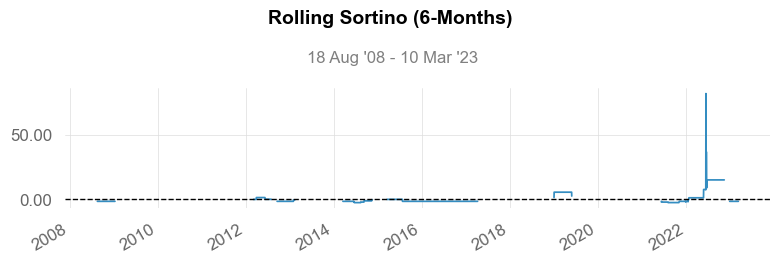

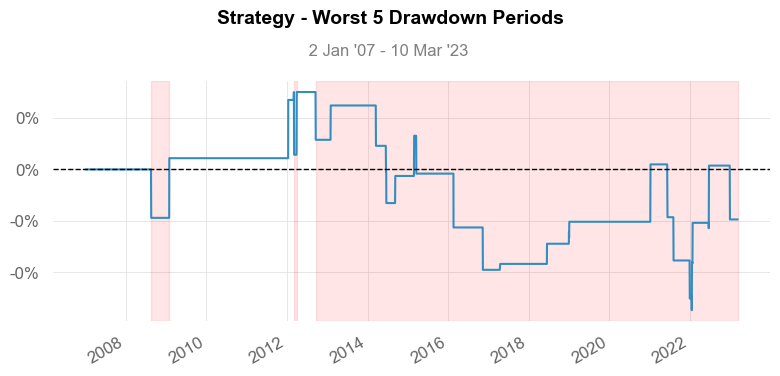

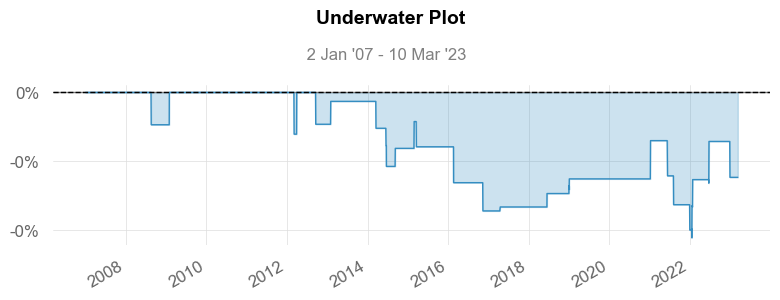

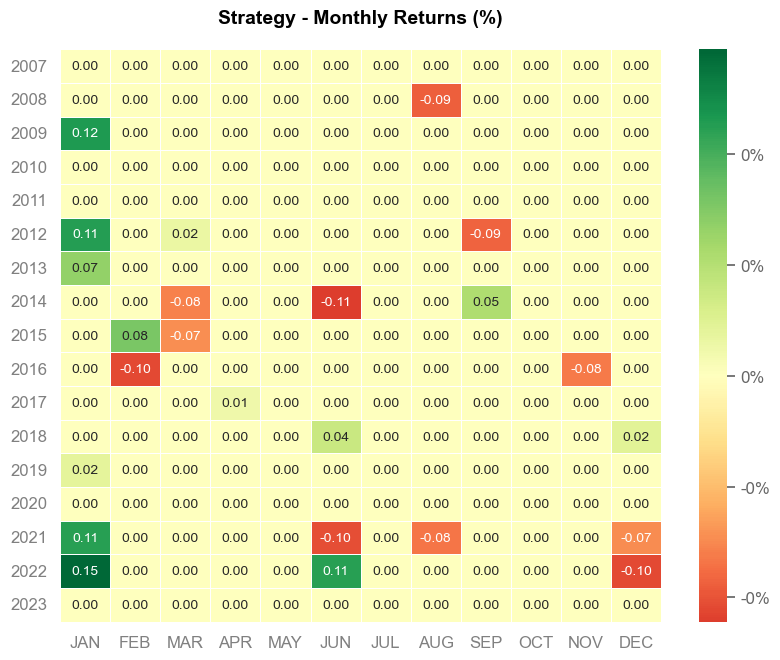

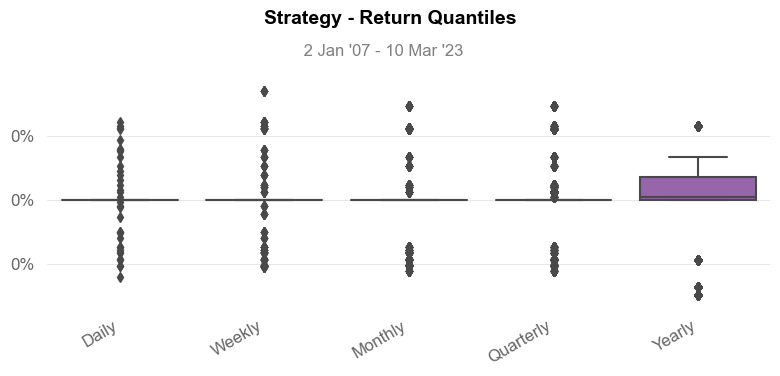

In [6]:
qs.reports.full(result_D1['Equity'].resample('D').last().dropna().pct_change())

### Compare benchmark Buy and Hold

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2008-08-18   2008-08-18
End Period                 2023-03-10   2023-03-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       1.0%

Cumulative Return          10.26%       -0.1%
CAGR﹪                     0.46%        -0.0%

Sharpe                     0.29         -0.05
Prob. Sharpe Ratio         88.6%        41.28%
Smart Sharpe               0.29         -0.05
Sortino                    0.39         -0.07
Smart Sortino              0.39         -0.07
Sortino/√2                 0.28         -0.05
Smart Sortino/√2           0.28         -0.05
Omega                      0.92         0.92

Max Drawdown               -7.6%        -0.42%
Longest DD Days            3259         3827
Volatility (ann.)          1.96%        0.1%
R^2                        0.0          0.0
Information Ratio          -0.02        -0.02
Calmar             

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2012-09-17  2022-01-17  2023-03-10  3827     -0.422529         -0.332923
2  2012-03-05  2012-03-05  2012-03-28    24     -0.121330               NaN

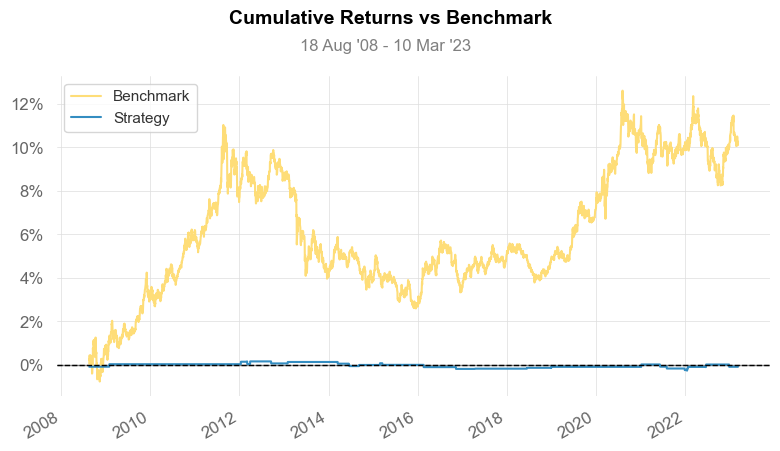

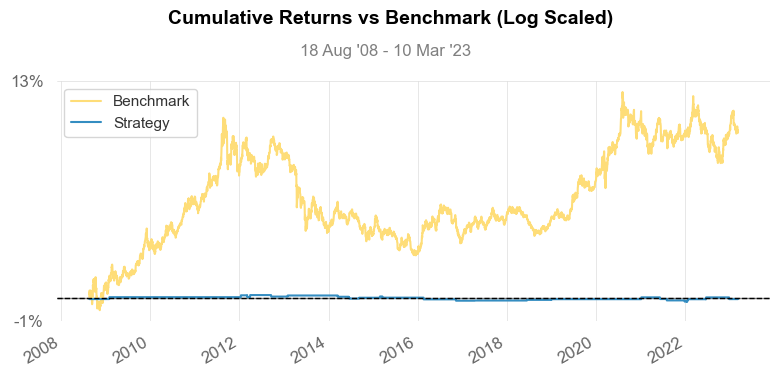

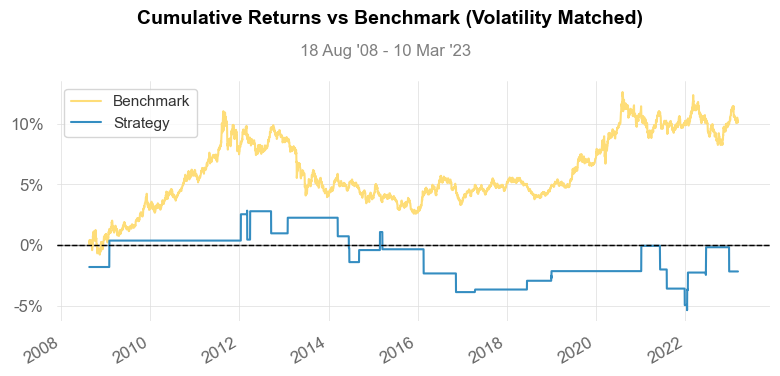

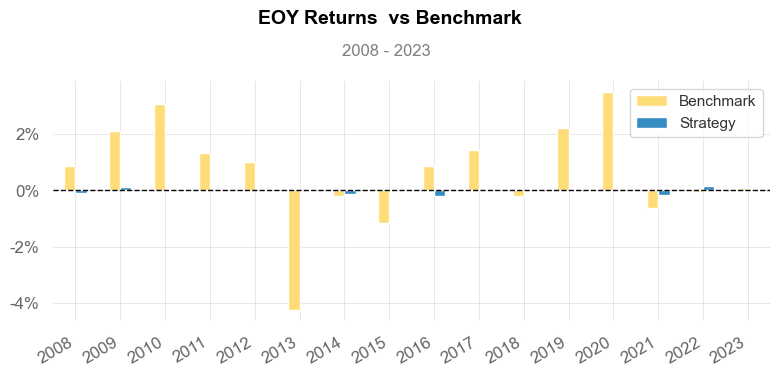

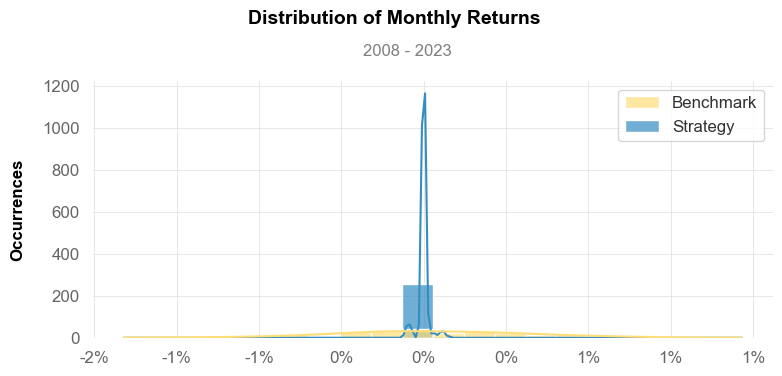

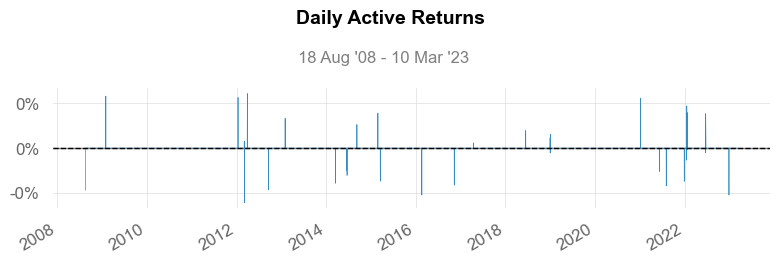

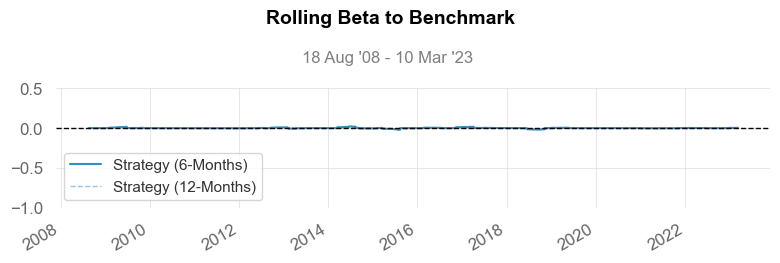

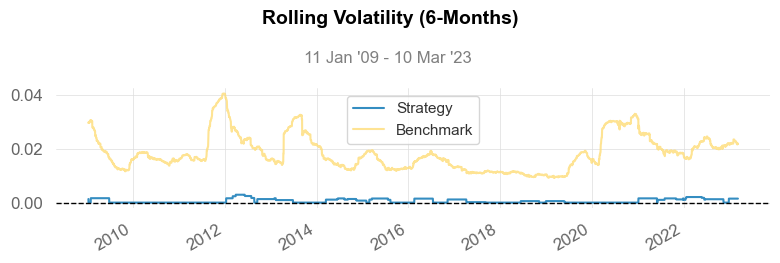

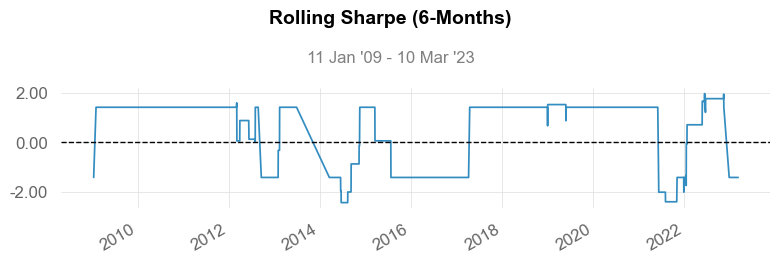

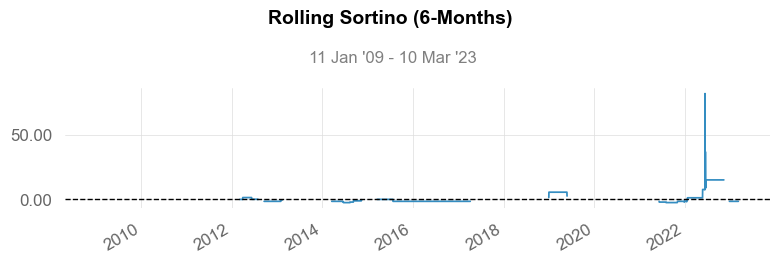

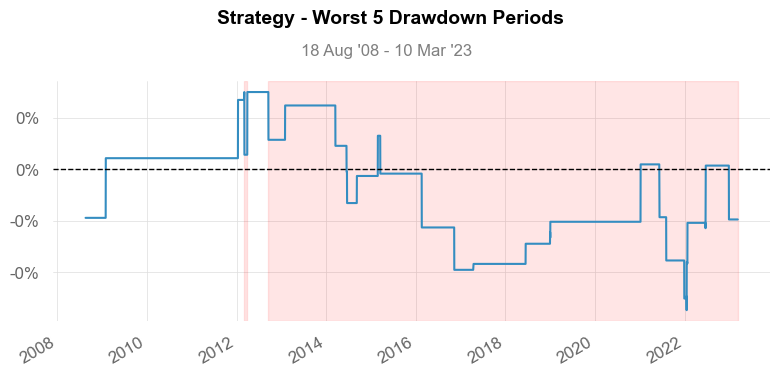

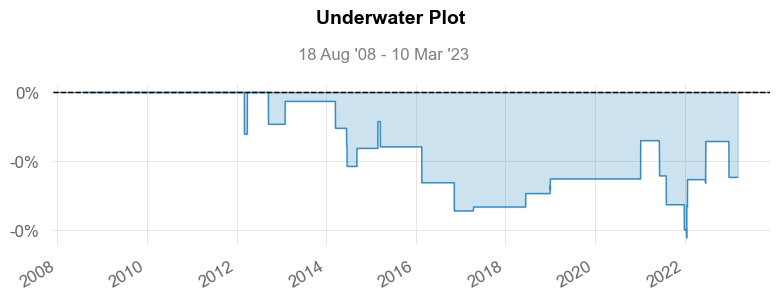

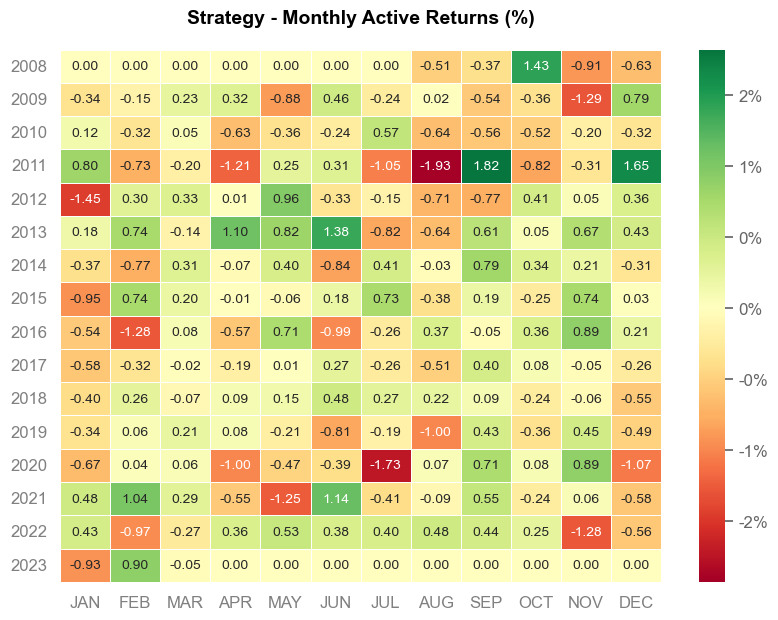

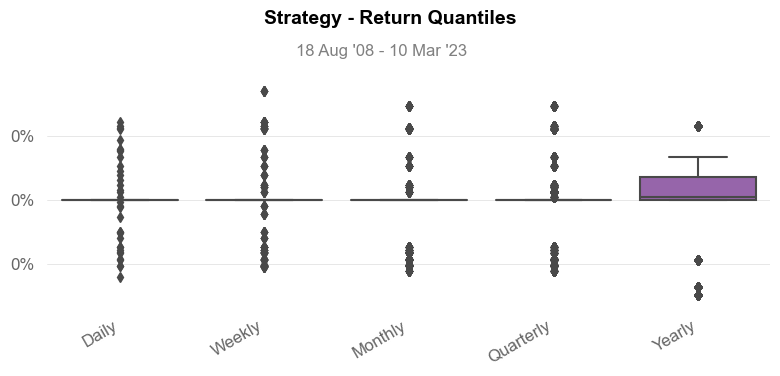

In [14]:
qs.reports.full(result_D1['Equity'].resample('D').last().dropna().pct_change(
), benchmark=benchmark_D1['Equity'].resample('D').last().dropna().pct_change())

## TF H4

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-02
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             4.0%

Cumulative Return          -0.76%
CAGR﹪                     -0.03%

Sharpe                     -0.32
Prob. Sharpe Ratio         6.45%
Smart Sharpe               -0.32
Sortino                    -0.4
Smart Sortino              -0.39
Sortino/√2                 -0.28
Smart Sortino/√2           -0.28
Omega                      0.78

Max Drawdown               -1.11%
Longest DD Days            5405
Volatility (ann.)          0.12%
Calmar                     -0.03
Skew                       -5.22
Kurtosis                   130.99

Expected Daily %           -0.0%
Expected Monthly %         -0.0%
Expected Yearly %          -0.05%
Kelly Criterion            -13.67%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.01%
Expected Shortfall (cVaR)  -0.01%

Max Consecutive Wi

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2008-05-23  2021-07-22  2023-03-10  5405     -1.110940         -1.061402
2  2007-08-17  2007-08-17  2007-12-06   112     -0.023578         -0.014331
3  2007-03-29  2007-05-15  2007-07-10   104     -0.021538         -0.019665
4  2007-03-08  2007-03-08  2007-03-08     1     -0.002023               NaN

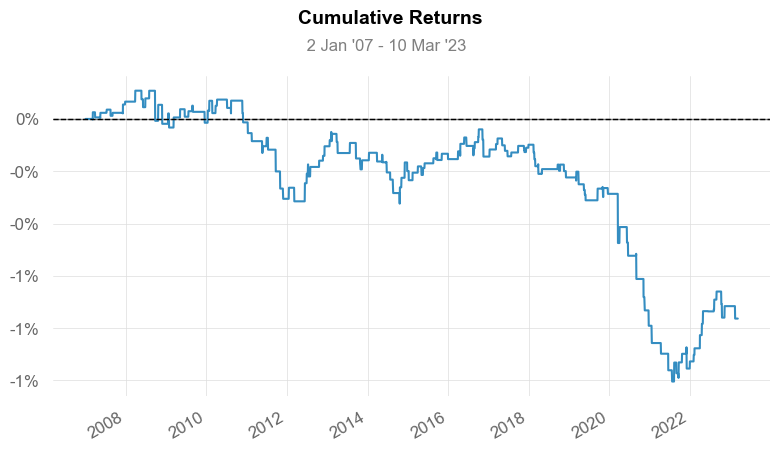

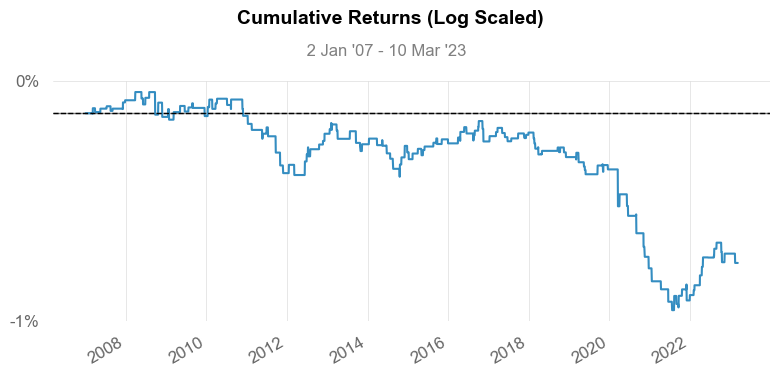

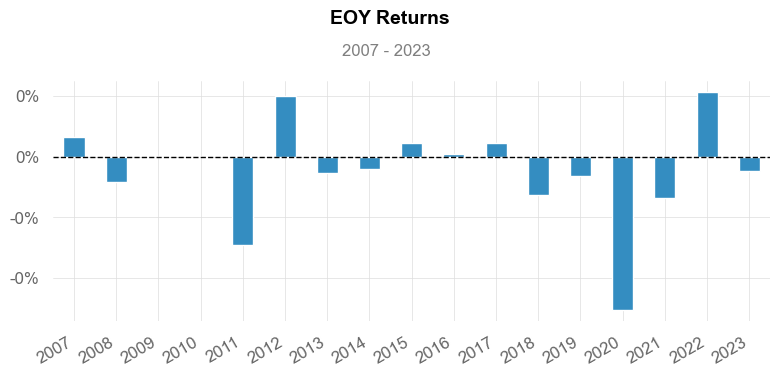

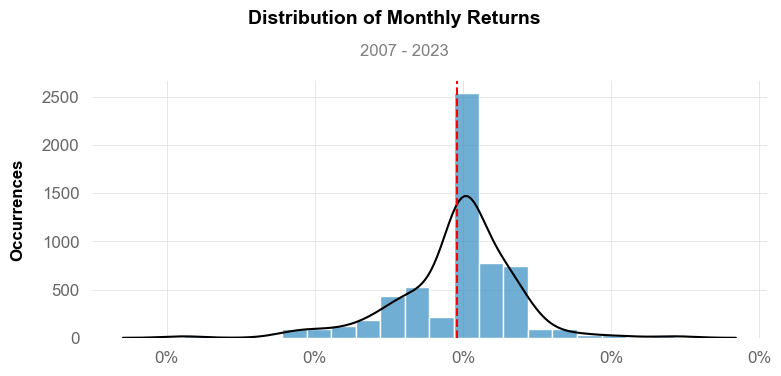

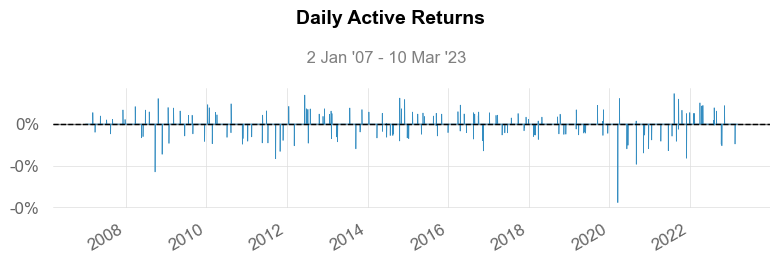

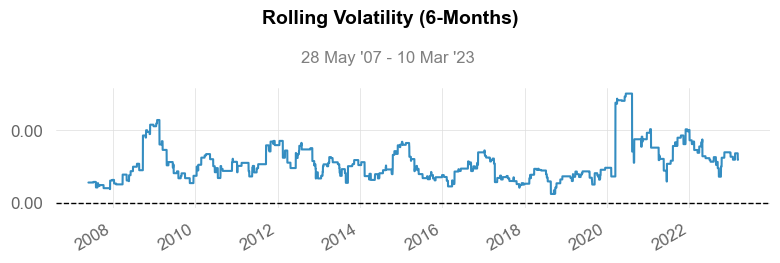

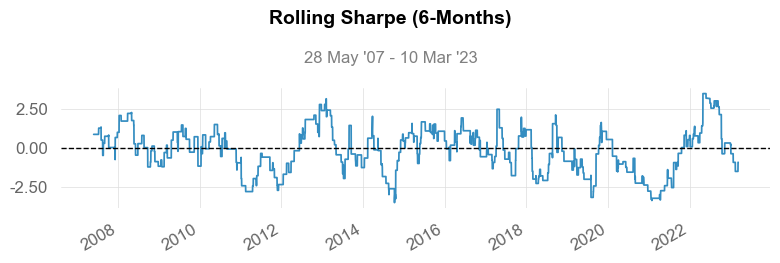

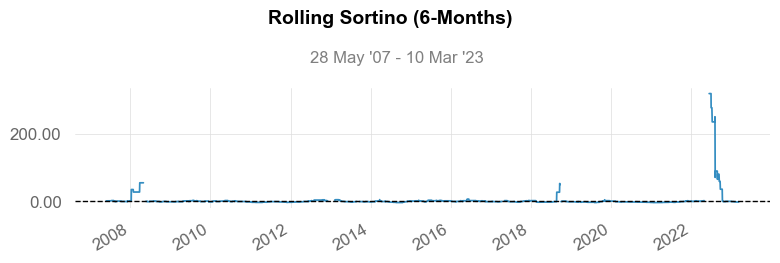

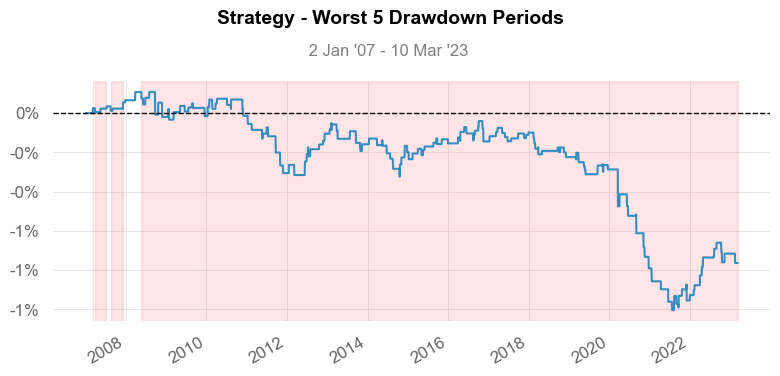

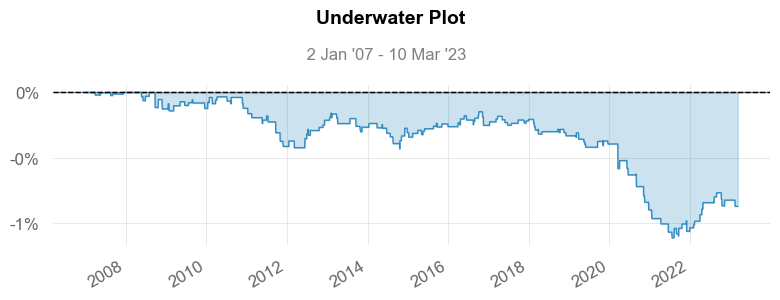

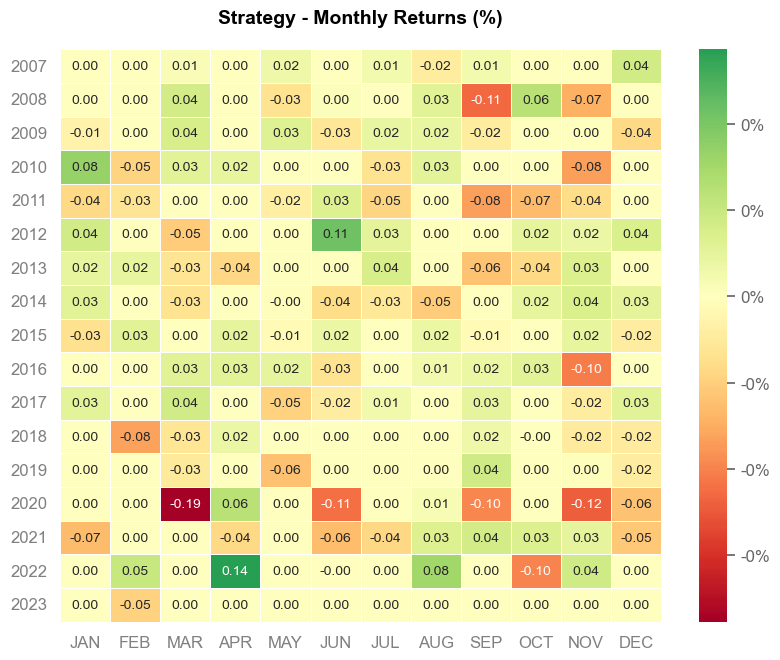

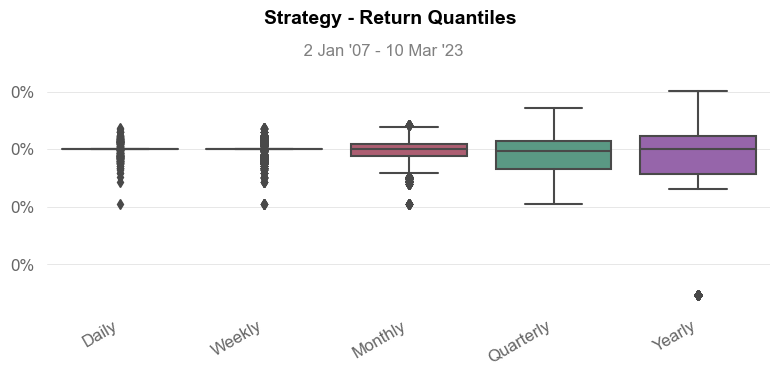

In [15]:
qs.reports.full(result_H4['Equity'].resample('D').last().dropna().pct_change())

### Compare benchmark Buy and Hold

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2007-03-08   2007-03-08
End Period                 2023-03-10   2023-03-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       4.0%

Cumulative Return          12.14%       -0.76%
CAGR﹪                     0.5%         -0.03%

Sharpe                     0.31         -0.33
Prob. Sharpe Ratio         91.45%       6.45%
Smart Sharpe               0.3          -0.32
Sortino                    0.42         -0.4
Smart Sortino              0.42         -0.4
Sortino/√2                 0.3          -0.29
Smart Sortino/√2           0.29         -0.28
Omega                      0.78         0.78

Max Drawdown               -7.6%        -1.11%
Longest DD Days            3259         5405
Volatility (ann.)          1.93%        0.12%
R^2                        0.0          0.0
Information Ratio          -0.02        -0.02
Calmar             

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2008-05-23  2021-07-22  2023-03-10  5405     -1.110940         -1.061402
2  2007-08-17  2007-08-17  2007-12-06   112     -0.023578         -0.014331
3  2007-03-29  2007-05-15  2007-07-10   104     -0.021538         -0.019665

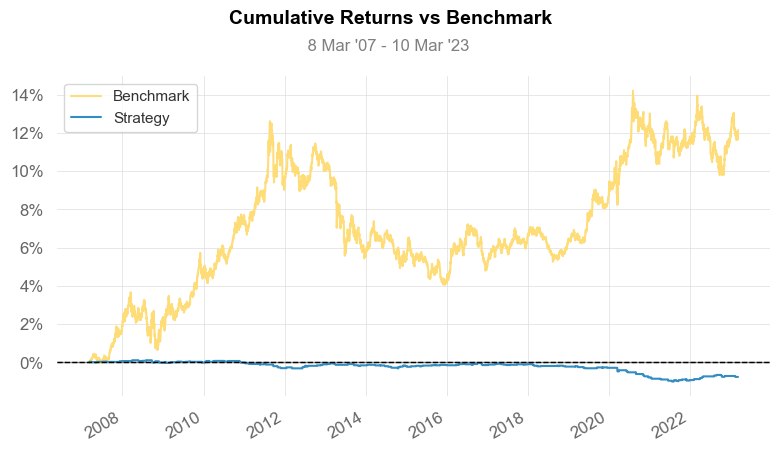

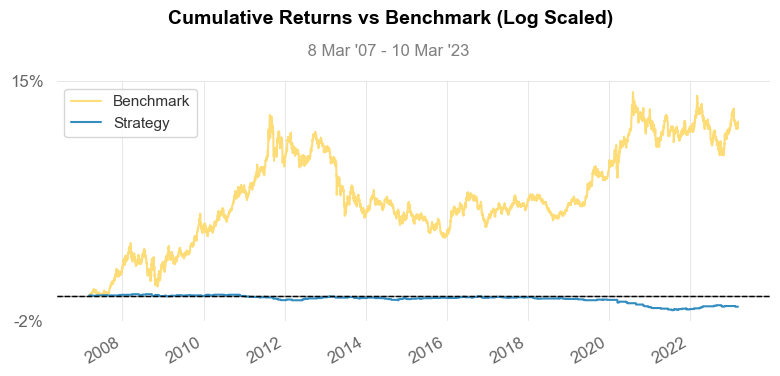

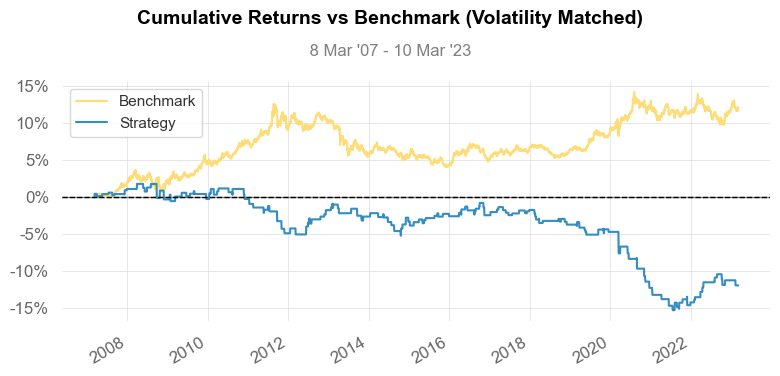

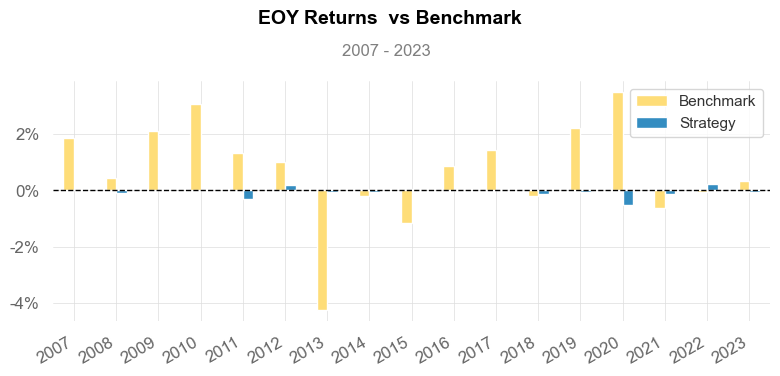

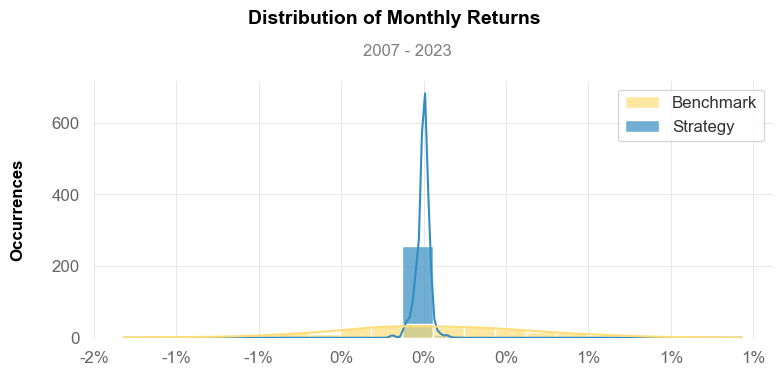

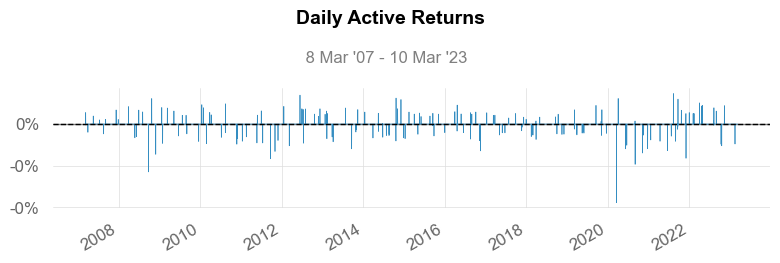

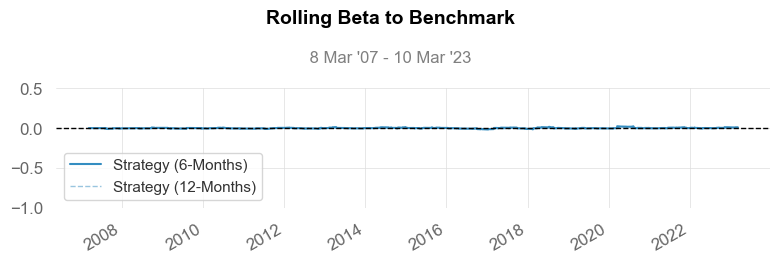

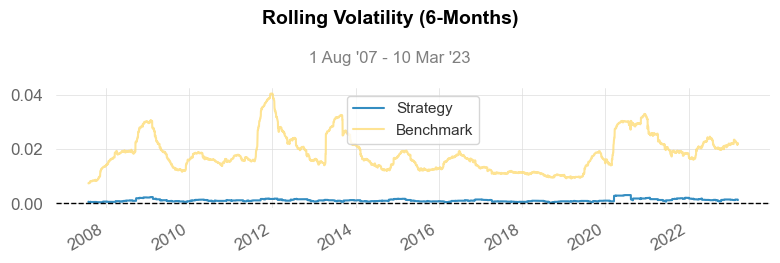

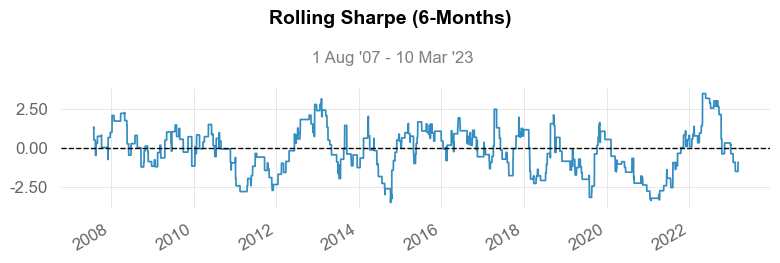

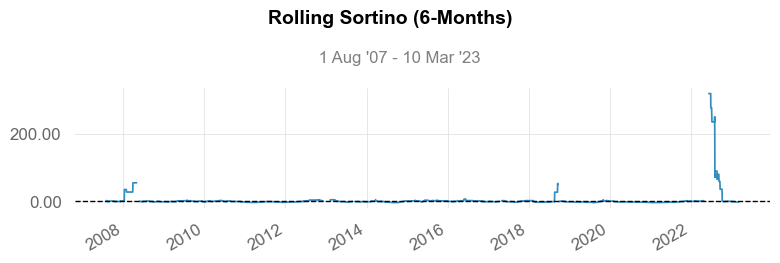

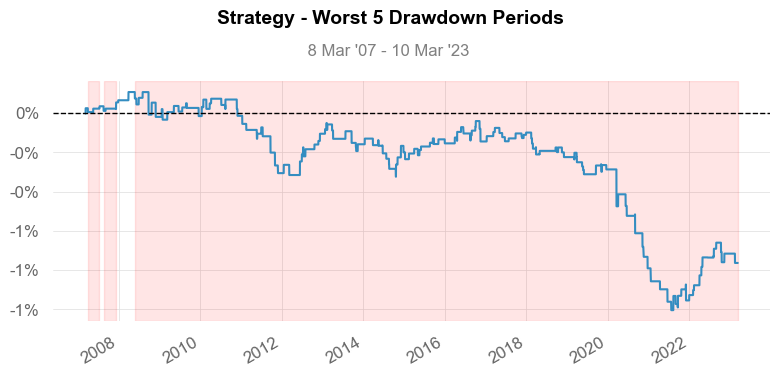

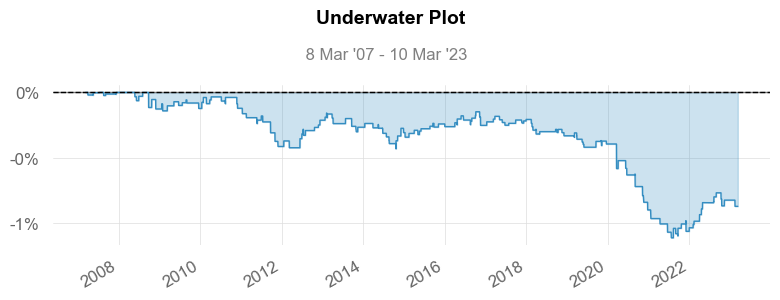

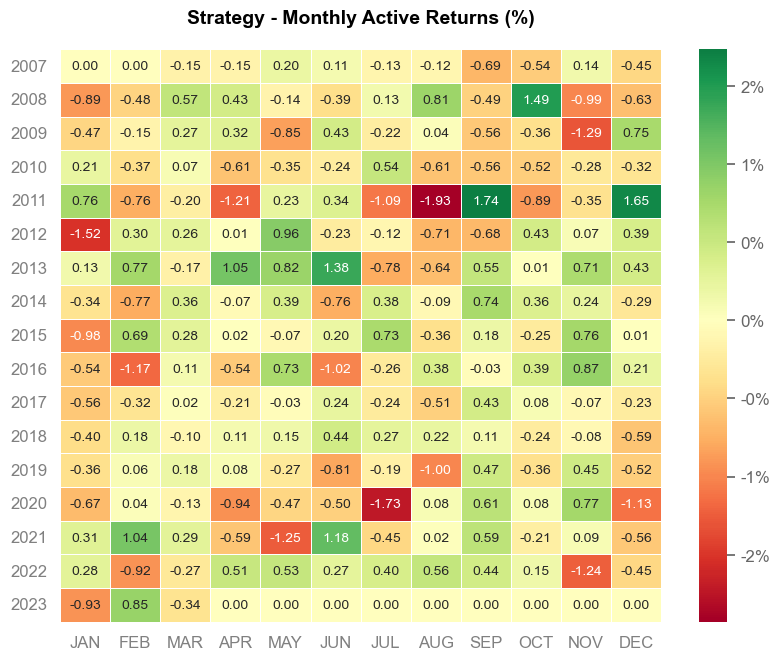

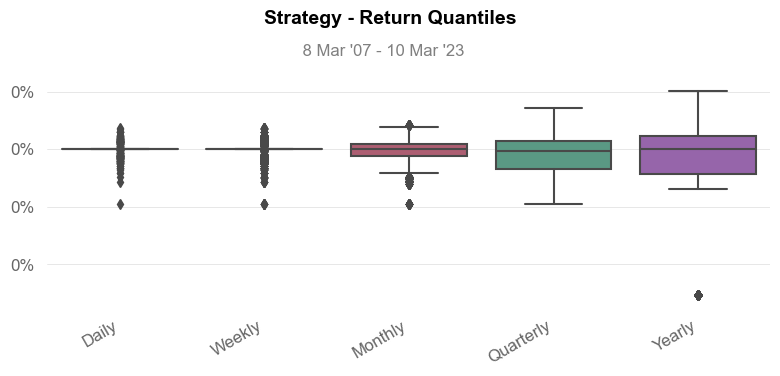

In [16]:
qs.reports.full(result_H4['Equity'].resample('D').last().dropna().pct_change(
), benchmark=benchmark_H4['Equity'].resample('D').last().dropna().pct_change())

## TF H1

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-02
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             12.0%

Cumulative Return          -2.43%
CAGR﹪                     -0.1%

Sharpe                     -1.03
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -1.0
Sortino                    -1.25
Smart Sortino              -1.21
Sortino/√2                 -0.88
Smart Sortino/√2           -0.86
Omega                      0.64

Max Drawdown               -2.45%
Longest DD Days            5862
Volatility (ann.)          0.12%
Calmar                     -0.04
Skew                       -2.14
Kurtosis                   25.03

Expected Daily %           -0.0%
Expected Monthly %         -0.01%
Expected Yearly %          -0.14%
Kelly Criterion            -25.66%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.01%
Expected Shortfall (cVaR)  -0.01%

Max Consecutive Win

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2007-02-21  2023-02-02  2023-03-10  5862     -2.448227         -2.388557

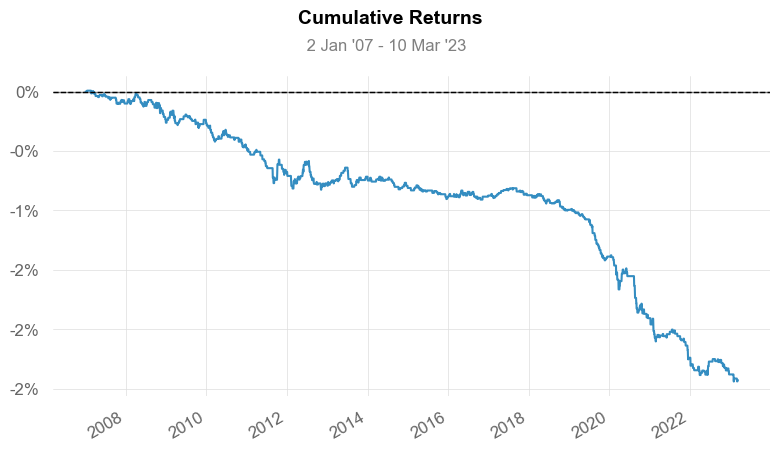

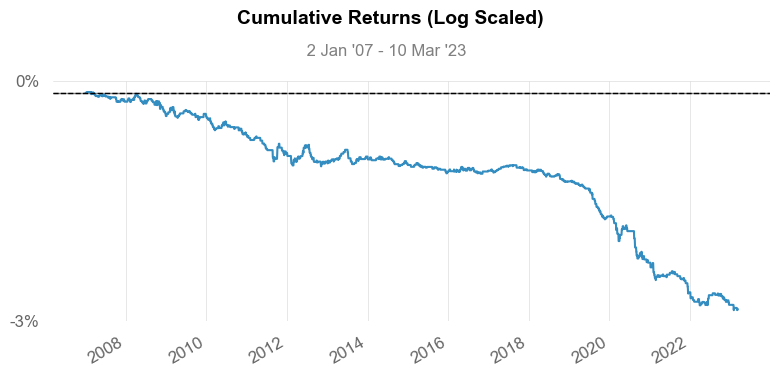

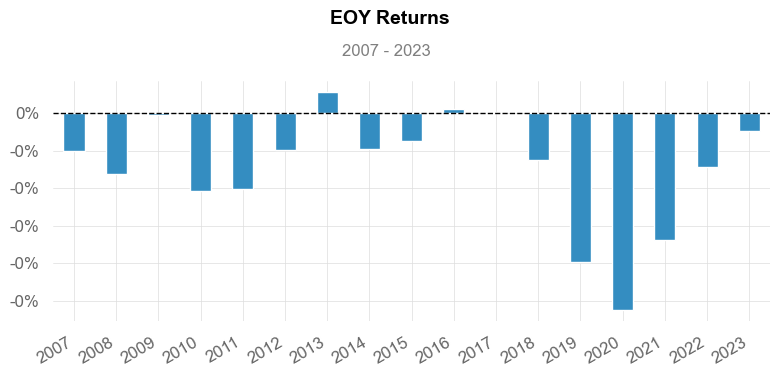

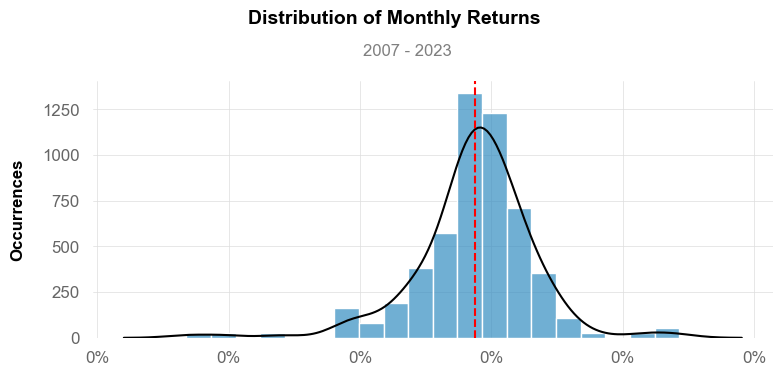

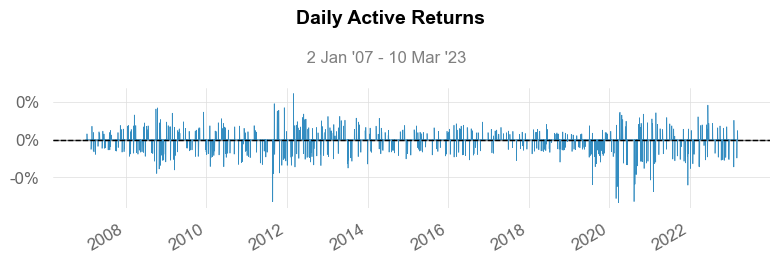

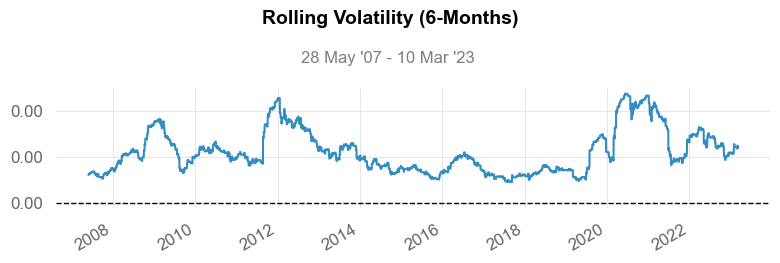

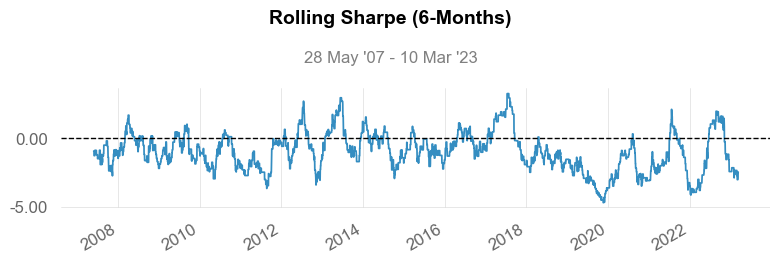

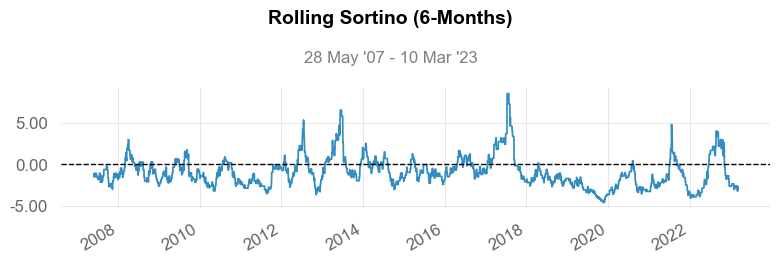

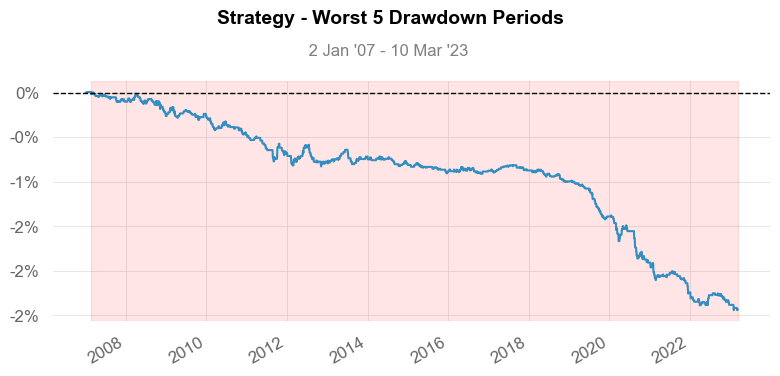

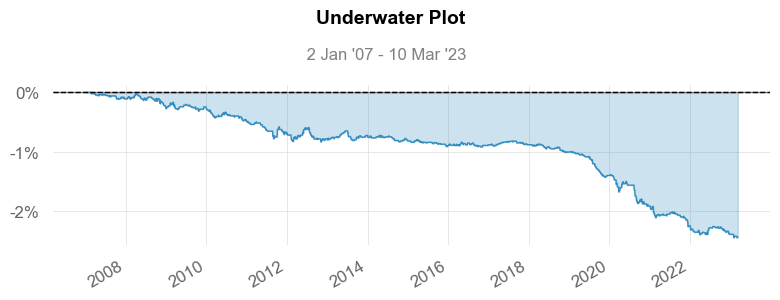

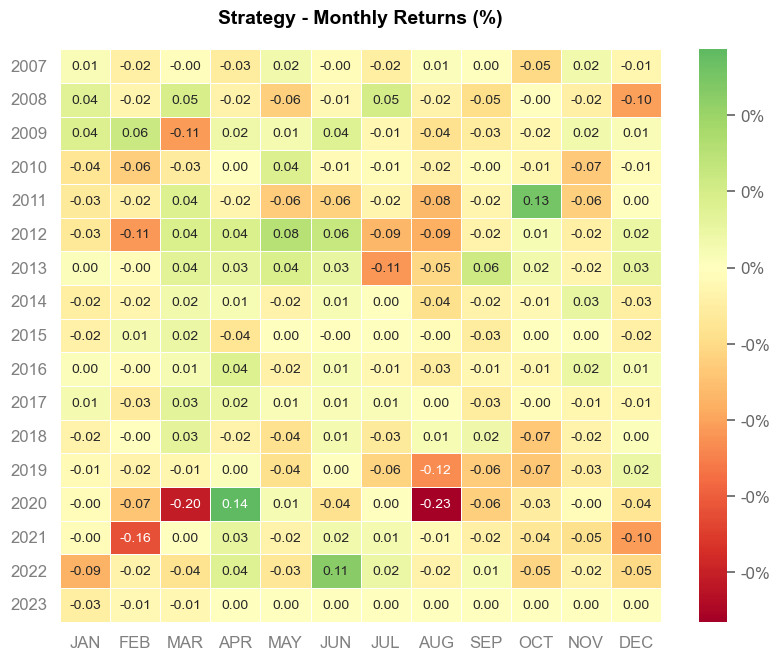

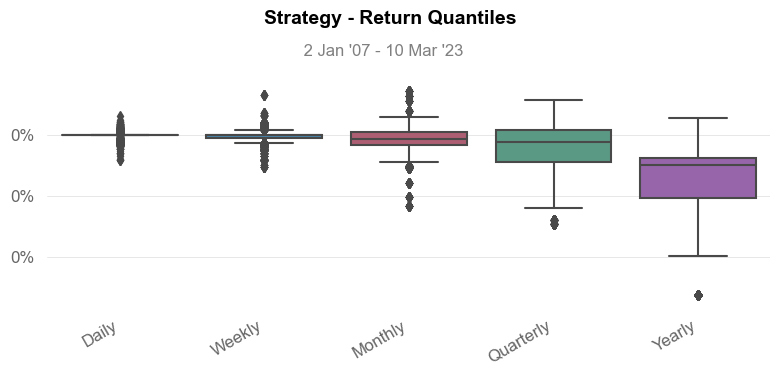

In [10]:
qs.reports.full(result_H1['Equity'].resample('D').last().dropna().pct_change())

### Compare benchmark Buy and Hold

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2007-01-15   2007-01-15
End Period                 2023-03-10   2023-03-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       12.0%

Cumulative Return          12.31%       -2.43%
CAGR﹪                     0.5%         -0.1%

Sharpe                     0.31         -1.03
Prob. Sharpe Ratio         91.68%       0.0%
Smart Sharpe               0.3          -1.0
Sortino                    0.43         -1.25
Smart Sortino              0.41         -1.21
Sortino/√2                 0.3          -0.88
Smart Sortino/√2           0.29         -0.86
Omega                      0.64         0.64

Max Drawdown               -7.6%        -2.45%
Longest DD Days            3259         5862
Volatility (ann.)          1.92%        0.12%
R^2                        0.0          0.0
Information Ratio          -0.02        -0.02
Calmar             

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2007-02-21  2023-02-02  2023-03-10  5862     -2.448227         -2.388557

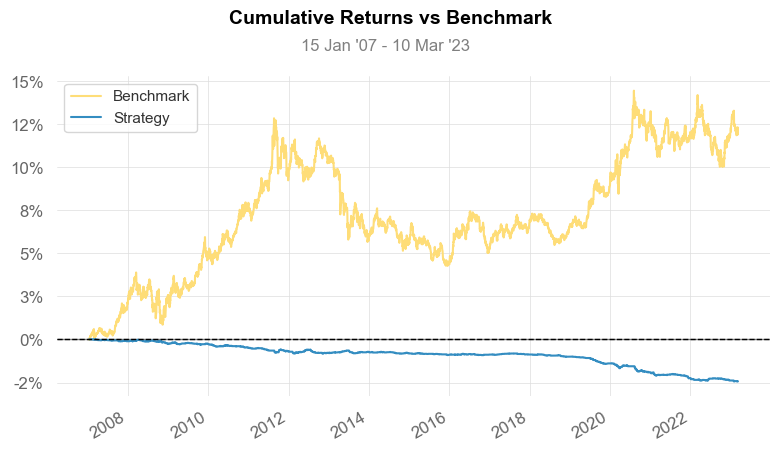

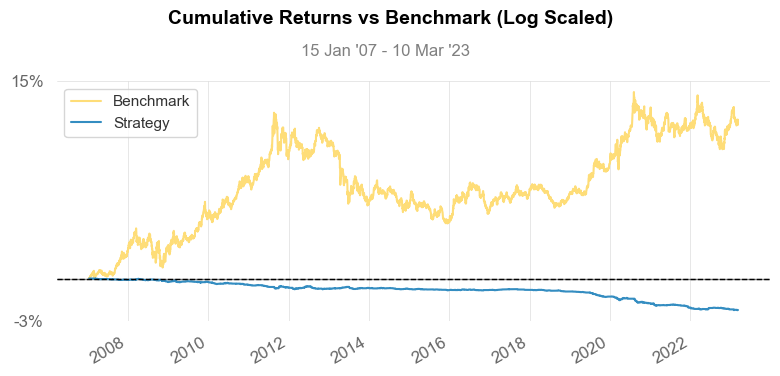

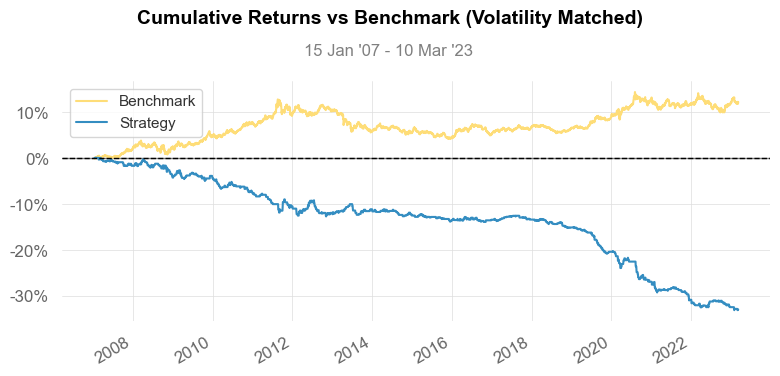

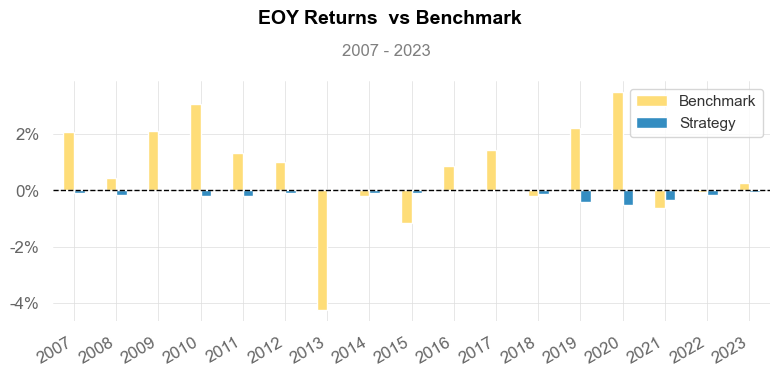

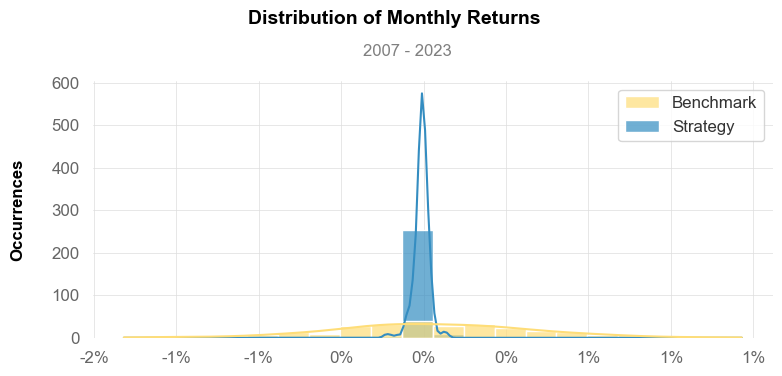

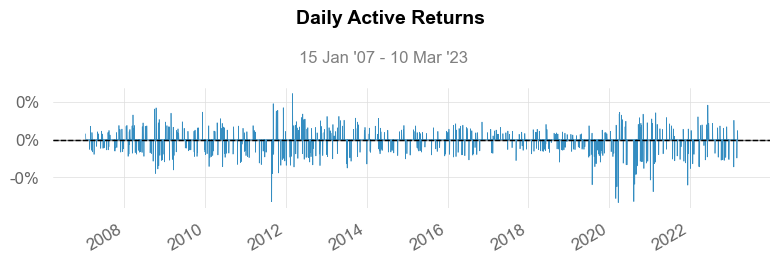

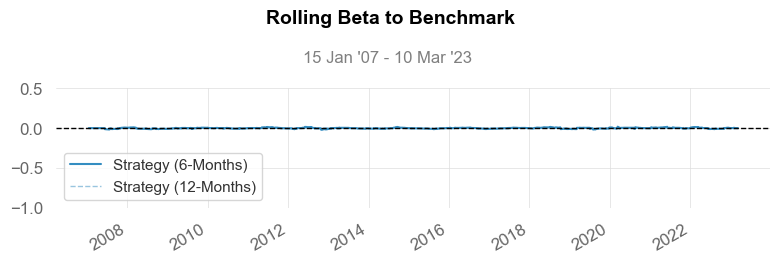

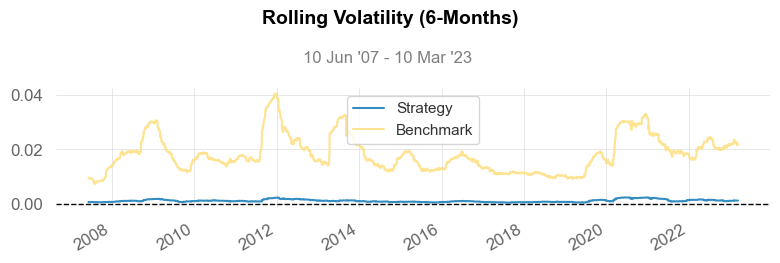

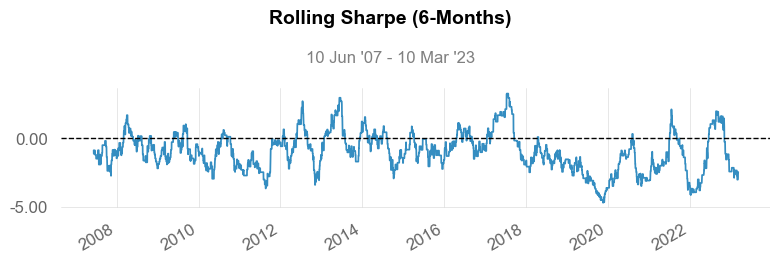

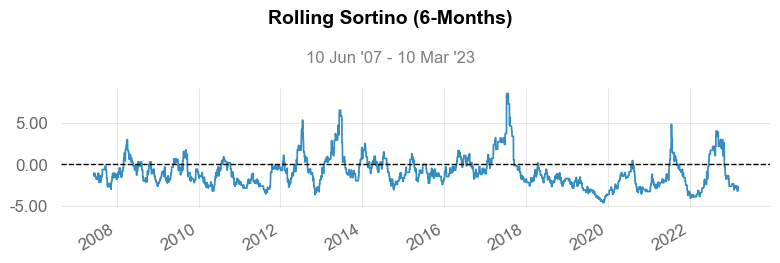

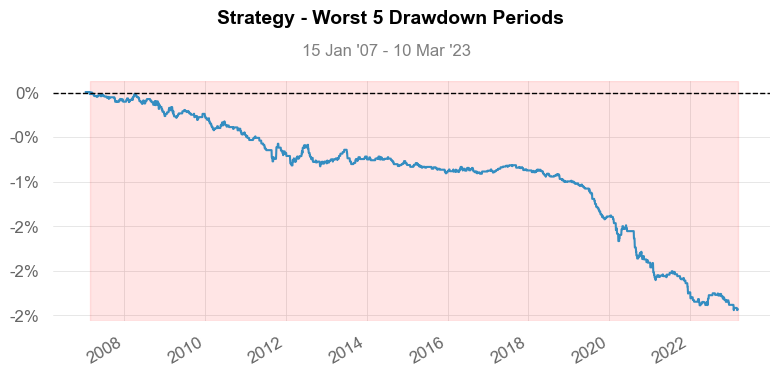

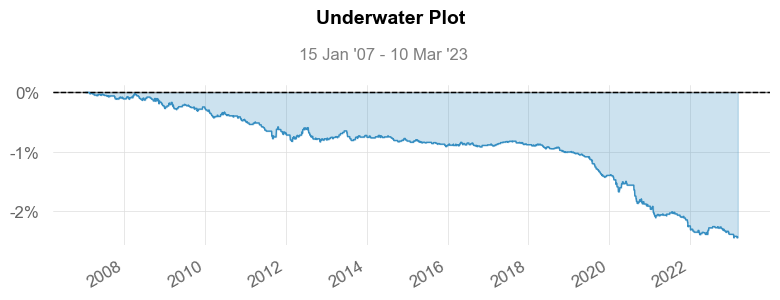

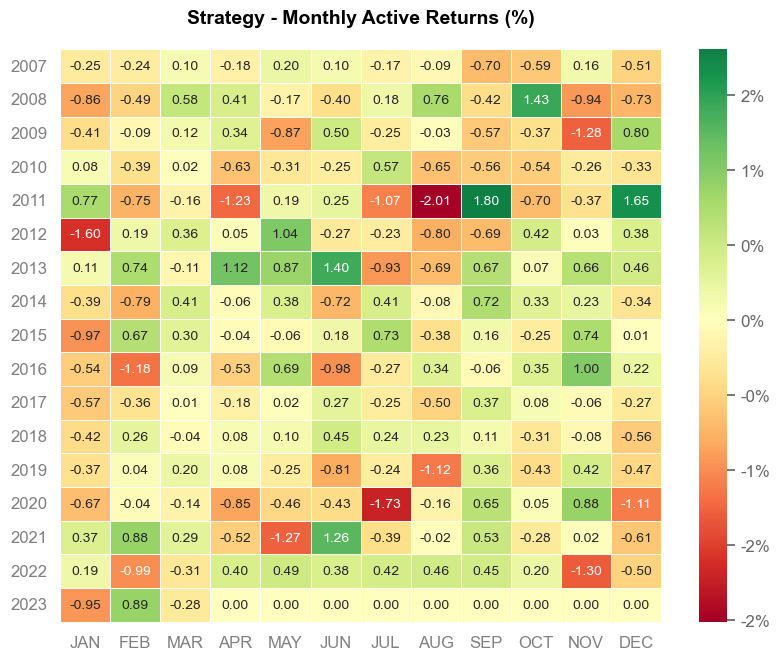

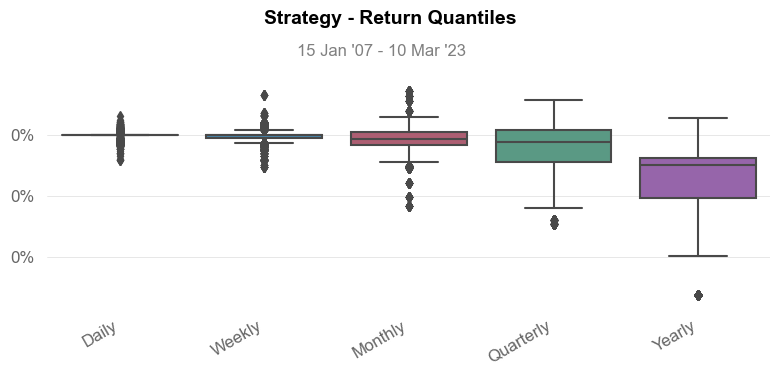

In [17]:
qs.reports.full(result_H1['Equity'].resample('D').last().dropna().pct_change(
), benchmark=benckmark_H1['Equity'].resample('D').last().dropna().pct_change())

## TF M30 

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-02
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             24.0%

Cumulative Return          -4.45%
CAGR﹪                     -0.19%

Sharpe                     -1.56
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -1.53
Sortino                    -1.89
Smart Sortino              -1.85
Sortino/√2                 -1.33
Smart Sortino/√2           -1.31
Omega                      0.62

Max Drawdown               -4.47%
Longest DD Days            5885
Volatility (ann.)          0.15%
Calmar                     -0.04
Skew                       -1.09
Kurtosis                   9.28

Expected Daily %           -0.0%
Expected Monthly %         -0.02%
Expected Yearly %          -0.27%
Kelly Criterion            -27.96%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.02%
Expected Shortfall (cVaR)  -0.02%

Max Consecutive Wi

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2007-01-29  2023-02-22  2023-03-10  5885     -4.466444         -4.283499

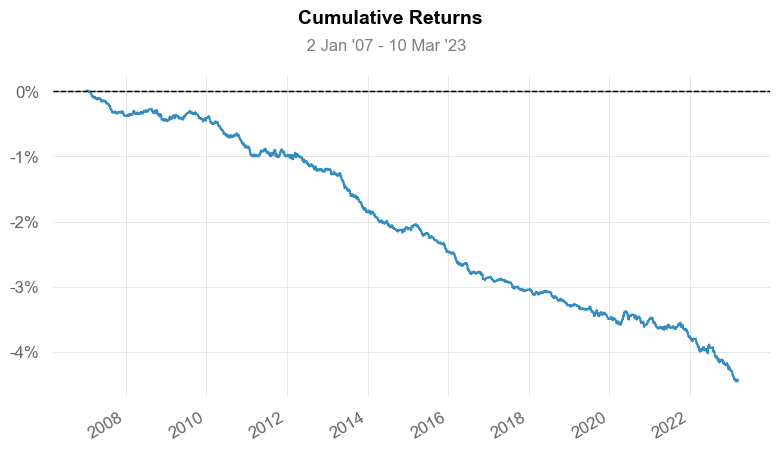

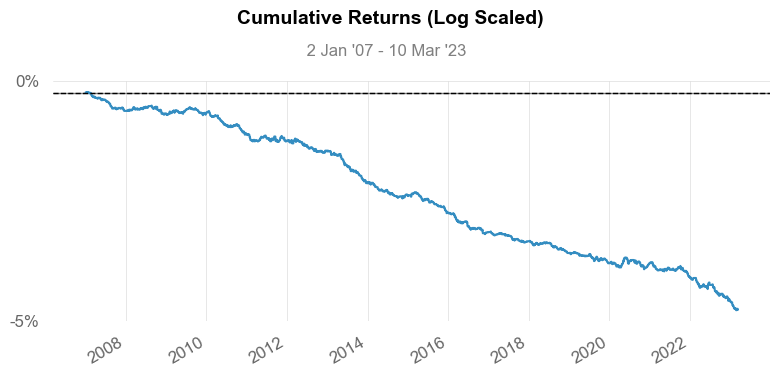

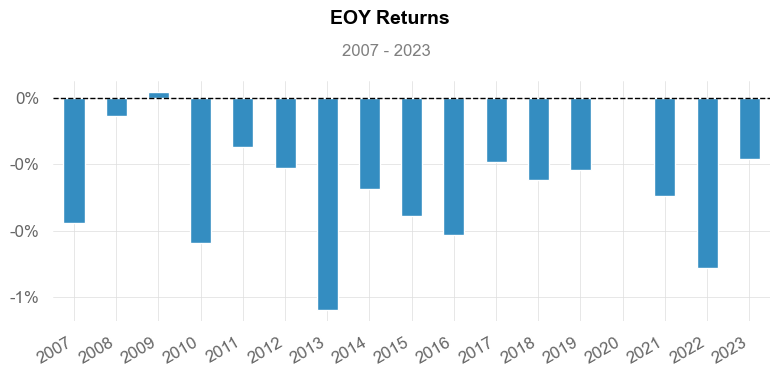

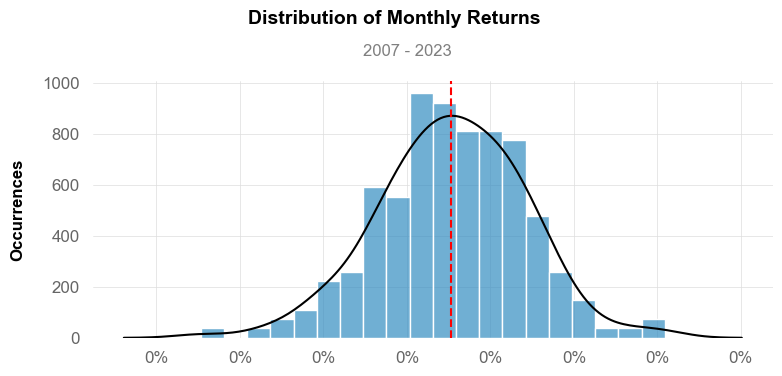

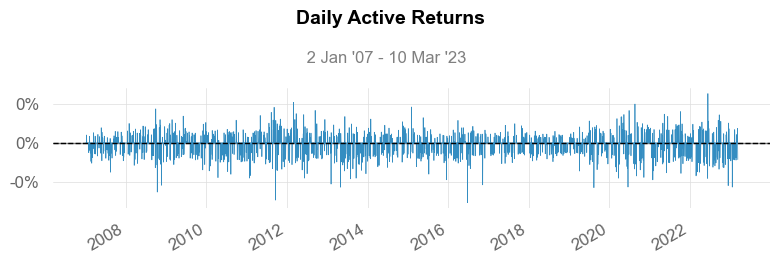

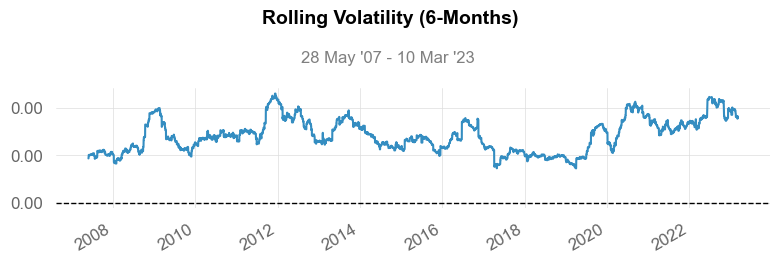

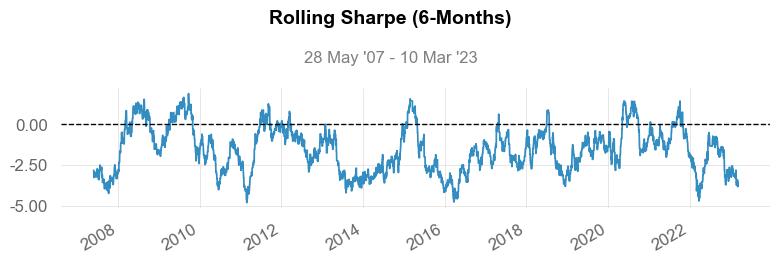

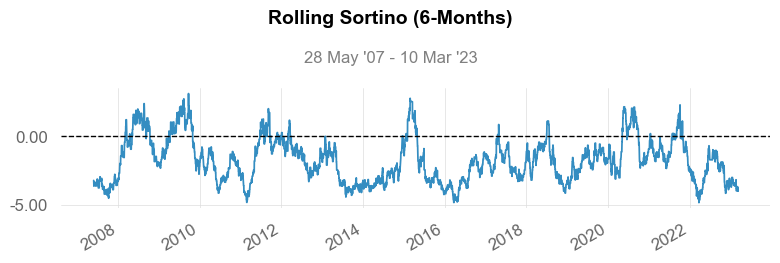

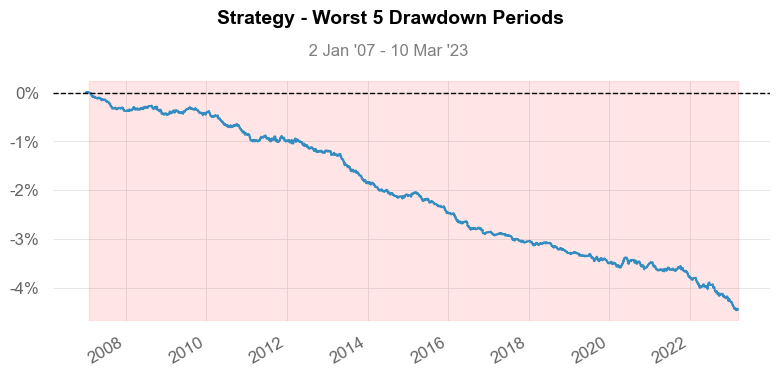

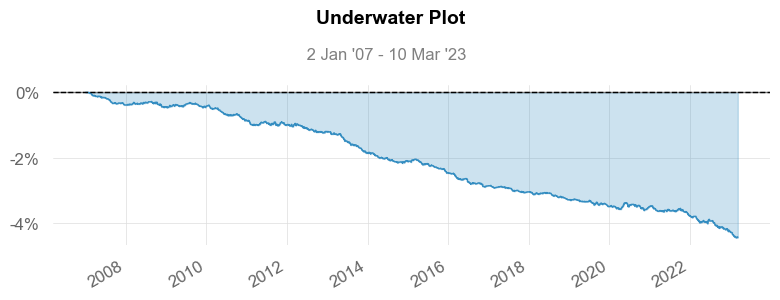

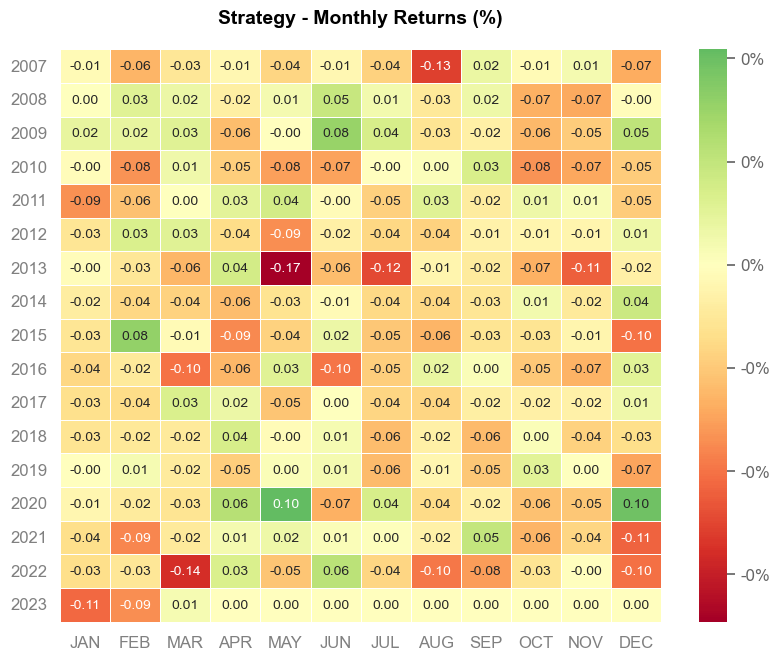

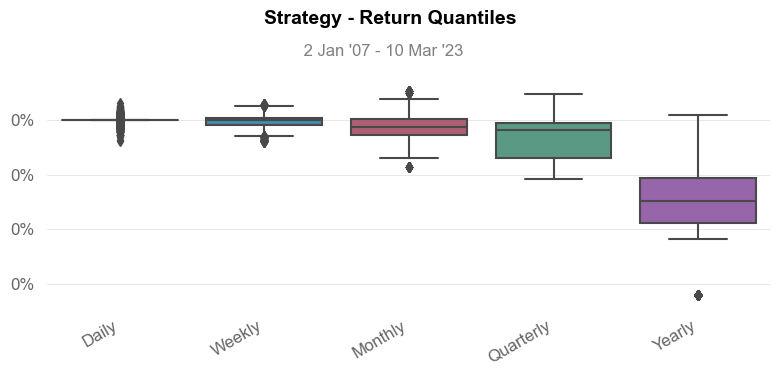

In [12]:
qs.reports.full(result_M30['Equity'].resample('D').last().dropna().pct_change())

### Compare benchmark Buy and Hold

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2007-01-11   2007-01-11
End Period                 2023-03-10   2023-03-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       24.0%

Cumulative Return          12.54%       -4.45%
CAGR﹪                     0.51%        -0.19%

Sharpe                     0.32         -1.56
Prob. Sharpe Ratio         92.04%       0.0%
Smart Sharpe               0.31         -1.53
Sortino                    0.43         -1.89
Smart Sortino              0.43         -1.85
Sortino/√2                 0.31         -1.34
Smart Sortino/√2           0.3          -1.31
Omega                      0.62         0.62

Max Drawdown               -7.6%        -4.47%
Longest DD Days            3259         5885
Volatility (ann.)          1.92%        0.15%
R^2                        0.0          0.0
Information Ratio          -0.03        -0.03
Calmar           

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2007-01-29  2023-02-22  2023-03-10  5885     -4.466444         -4.283499

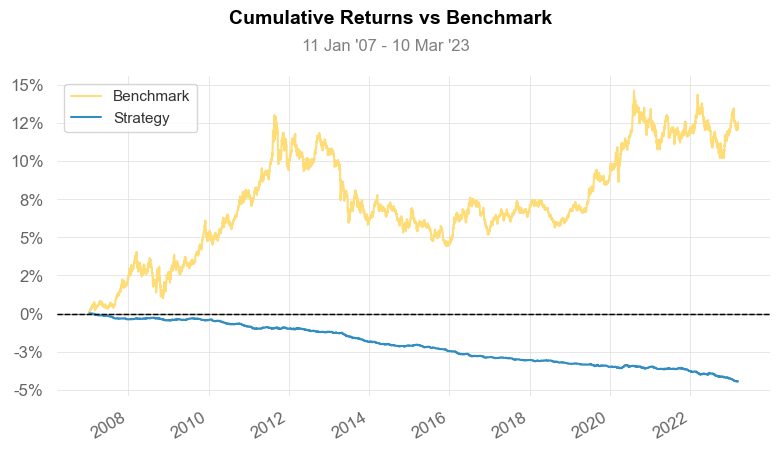

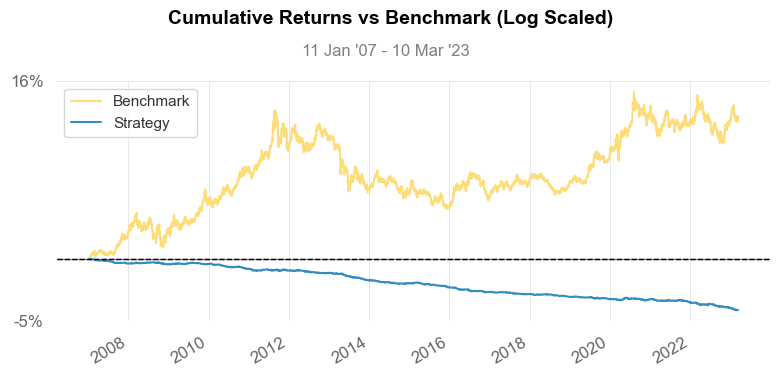

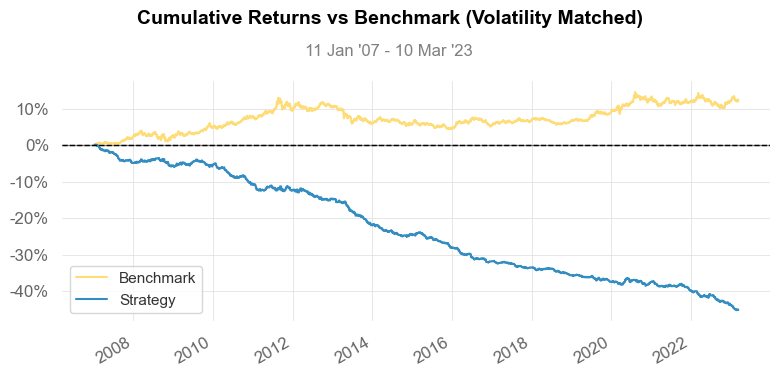

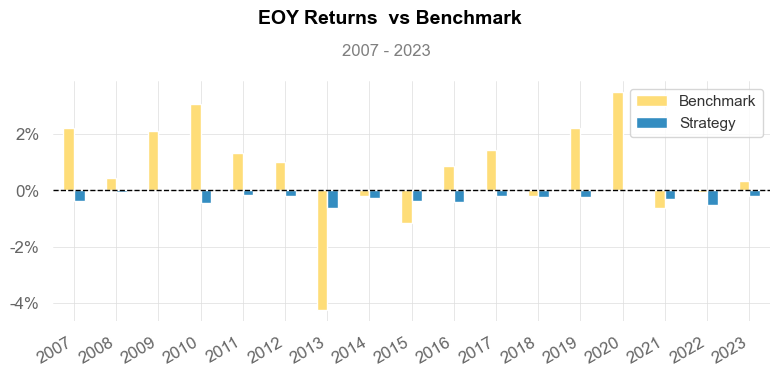

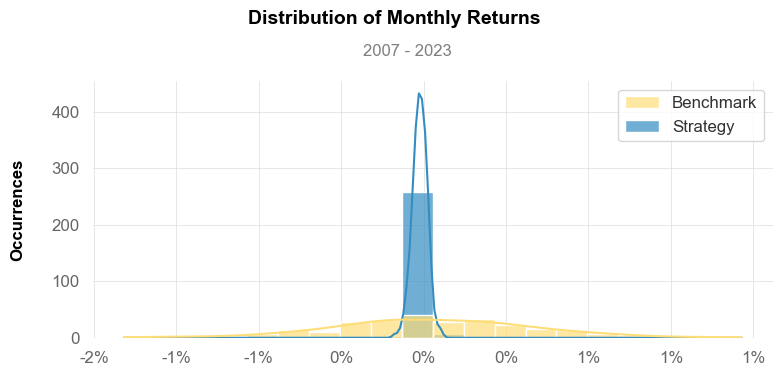

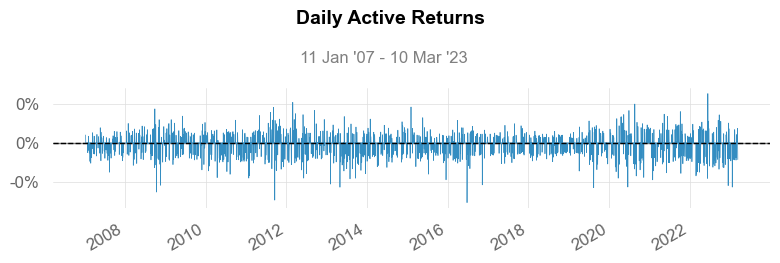

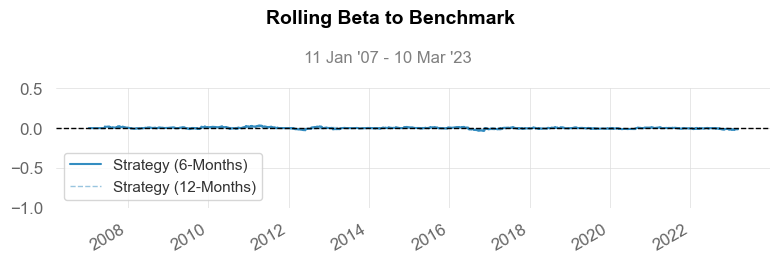

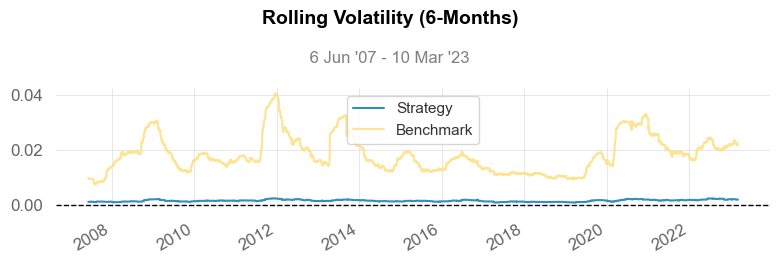

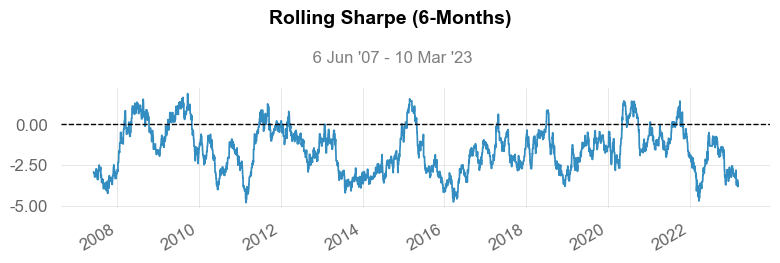

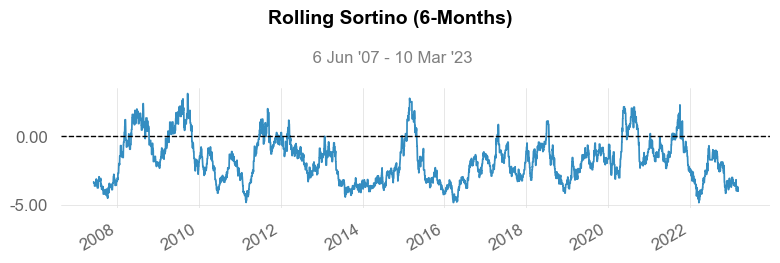

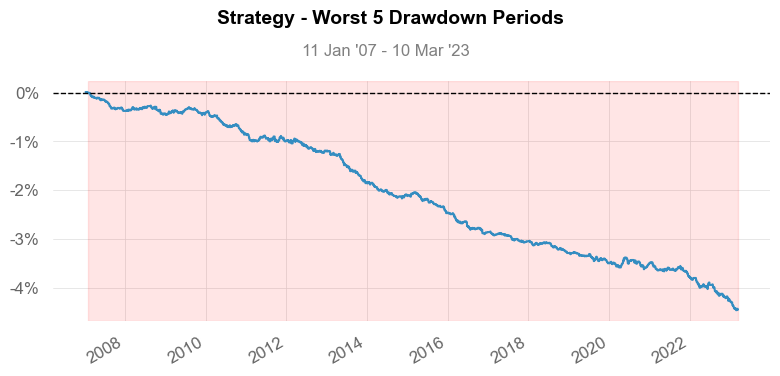

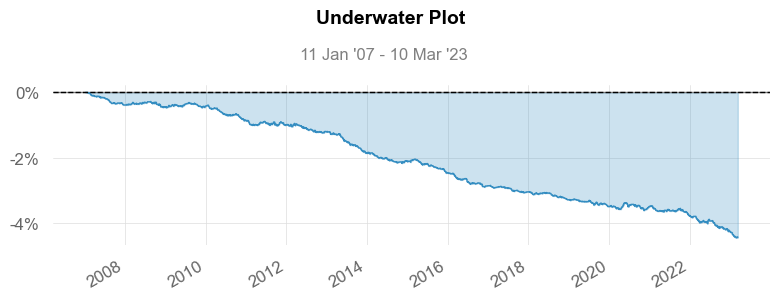

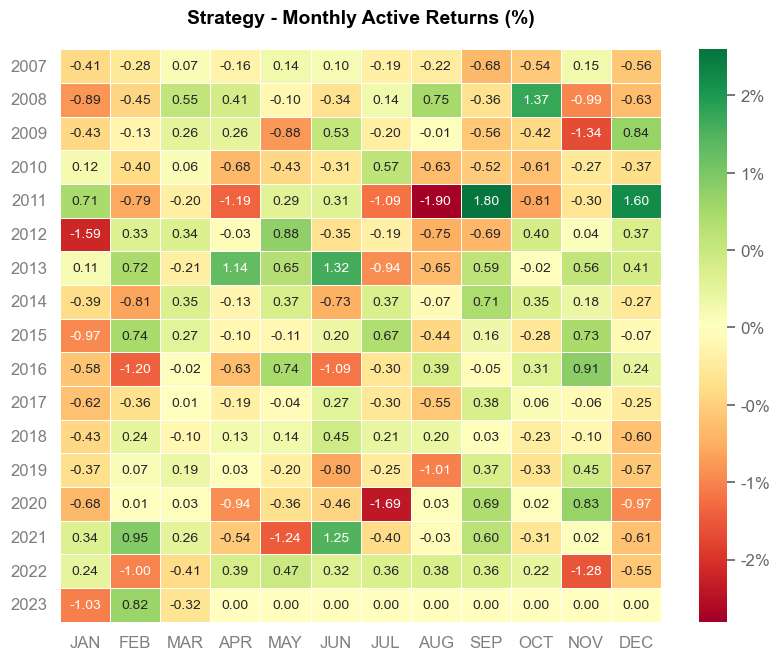

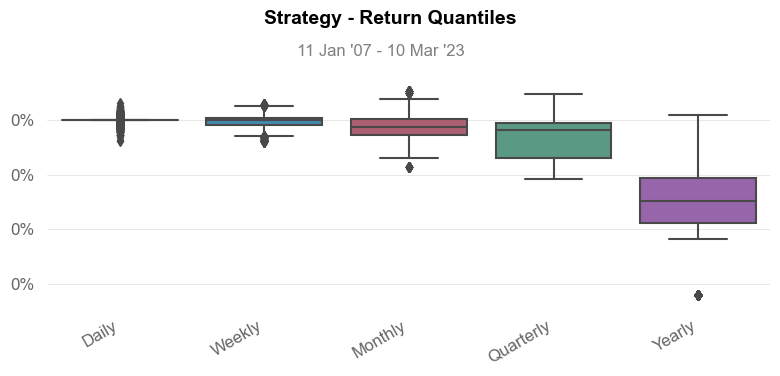

In [18]:
qs.reports.full(result_M30['Equity'].resample('D').last().dropna().pct_change(
), benchmark=benckmark_M30['Equity'].resample('D').last().dropna().pct_change())